In [1]:
import pickle
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data from each band (assuming files are named accordingly)
with open('IowaDataset/processed/delta.pkl', 'rb') as f:
    delta_data = pickle.load(f)['data']
with open('IowaDataset/processed/theta.pkl', 'rb') as f:
    theta_data = pickle.load(f)['data']
with open('IowaDataset/processed/alpha.pkl', 'rb') as f:
    alpha_data = pickle.load(f)['data']
with open('IowaDataset/processed/beta.pkl', 'rb') as f:
    beta_data = pickle.load(f)['data']
with open('IowaDataset/processed/gamma.pkl', 'rb') as f:
    gamma_data = pickle.load(f)['data']

In [3]:
# Stack the bands along the third dimension
data = np.stack([delta_data, theta_data, alpha_data, beta_data, gamma_data], axis=-1)  # shape: (5580, 32, 5)

In [4]:
data.shape

(3360, 29, 5)

In [5]:
# Load labels (assume the labels are the same for each band)
with open('IowaDataset/processed/gamma.pkl', 'rb') as f:
    labels = pickle.load(f)['labels']

In [6]:
# Standardize the data across the flattened feature axis
data = data.reshape(-1, data.shape[-2] * data.shape[-1])
scaler = StandardScaler()
data = scaler.fit_transform(data).reshape(-1, 29, 5)

In [7]:
data.shape

(3360, 29, 5)

In [8]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42, stratify=labels)

In [9]:
# Build the CNN model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(29, 5, 1)),
    MaxPooling2D(pool_size=(2, 1)),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 1)),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use sigmoid if labels are not one-hot encoded
])

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/20
86/86 [==============================] - 7s 71ms/step - loss: 0.5614 - accuracy: 0.7247 - val_loss: 0.4700 - val_accuracy: 0.7789
Epoch 2/20
86/86 [==============================] - 6s 68ms/step - loss: 0.3875 - accuracy: 0.8335 - val_loss: 0.3131 - val_accuracy: 0.8614
Epoch 3/20
86/86 [==============================] - 6s 66ms/step - loss: 0.2884 - accuracy: 0.8886 - val_loss: 0.1893 - val_accuracy: 0.9406
Epoch 4/20
86/86 [==============================] - 6s 71ms/step - loss: 0.1920 - accuracy: 0.9331 - val_loss: 0.1183 - val_accuracy: 0.9604
Epoch 5/20
86/86 [==============================] - 6s 64ms/step - loss: 0.1435 - accuracy: 0.9500 - val_loss: 0.0904 - val_accuracy: 0.9835
Epoch 6/20
86/86 [==============================] - 6s 66ms/step - loss: 0.1038 - accuracy: 0.9684 - val_loss: 0.0783 - val_accuracy: 0.9736
Epoch 7/20
86/86 [==============================] - 6s 65ms/step - loss: 0.0816 - accuracy: 0.9776 - val_loss: 0.0476 - val_accuracy: 0.9901
Epoch 8/20
86

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

Training fold 1...
Epoch 1/10
84/84 [==============================] - 7s 75ms/step - loss: 0.5547 - accuracy: 0.7080 - val_loss: 0.3852 - val_accuracy: 0.8676
Epoch 2/10
84/84 [==============================] - 6s 72ms/step - loss: 0.4070 - accuracy: 0.8300 - val_loss: 0.2664 - val_accuracy: 0.9360
Epoch 3/10
84/84 [==============================] - 6s 67ms/step - loss: 0.3049 - accuracy: 0.8839 - val_loss: 0.1448 - val_accuracy: 0.9658
Epoch 4/10
84/84 [==============================] - 6s 66ms/step - loss: 0.2139 - accuracy: 0.9174 - val_loss: 0.0884 - val_accuracy: 0.9792
Epoch 5/10
84/84 [==============================] - 6s 70ms/step - loss: 0.1520 - accuracy: 0.9475 - val_loss: 0.0668 - val_accuracy: 0.9821
Epoch 6/10
84/84 [==============================] - 6s 66ms/step - loss: 0.1237 - accuracy: 0.9550 - val_loss: 0.0528 - val_accuracy: 0.9836
Epoch 7/10
84/84 [==============================] - 6s 65ms/step - loss: 0.0964 - accuracy: 0.9688 - val_loss: 0.0376 - val_accuracy: 0

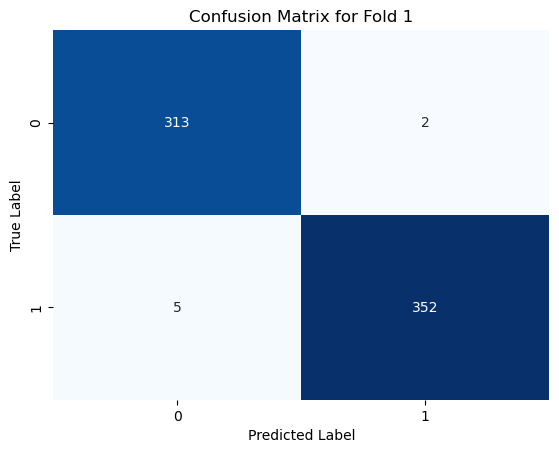

Fold 1 - Accuracy: 0.9895833333333334, Precision: 0.9943502824858758, Recall: 0.9859943977591037, F1 Score: 0.9901547116736991, AUC: 0.9998755057578588
Training fold 2...
Epoch 1/10
84/84 [==============================] - 7s 73ms/step - loss: 0.5394 - accuracy: 0.7481 - val_loss: 0.4379 - val_accuracy: 0.8065
Epoch 2/10
84/84 [==============================] - 6s 69ms/step - loss: 0.3683 - accuracy: 0.8512 - val_loss: 0.2932 - val_accuracy: 0.8750
Epoch 3/10
84/84 [==============================] - 6s 69ms/step - loss: 0.2596 - accuracy: 0.9033 - val_loss: 0.1914 - val_accuracy: 0.9226
Epoch 4/10
84/84 [==============================] - 6s 68ms/step - loss: 0.1932 - accuracy: 0.9312 - val_loss: 0.1053 - val_accuracy: 0.9732
Epoch 5/10
84/84 [==============================] - 6s 69ms/step - loss: 0.1321 - accuracy: 0.9535 - val_loss: 0.0756 - val_accuracy: 0.9807
Epoch 6/10
84/84 [==============================] - 6s 72ms/step - loss: 0.0994 - accuracy: 0.9688 - val_loss: 0.0536 - val_

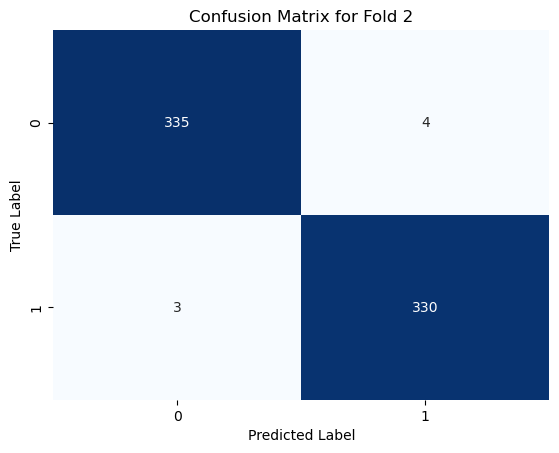

Fold 2 - Accuracy: 0.9895833333333334, Precision: 0.9880239520958084, Recall: 0.990990990990991, F1 Score: 0.9895052473763118, AUC: 0.9996633801943536
Training fold 3...
Epoch 1/10
84/84 [==============================] - 6s 70ms/step - loss: 0.5388 - accuracy: 0.7400 - val_loss: 0.4021 - val_accuracy: 0.8199
Epoch 2/10
84/84 [==============================] - 6s 68ms/step - loss: 0.3989 - accuracy: 0.8352 - val_loss: 0.3135 - val_accuracy: 0.8557
Epoch 3/10
84/84 [==============================] - 5s 65ms/step - loss: 0.2926 - accuracy: 0.8943 - val_loss: 0.1719 - val_accuracy: 0.9390
Epoch 4/10
84/84 [==============================] - 5s 62ms/step - loss: 0.2055 - accuracy: 0.9315 - val_loss: 0.1145 - val_accuracy: 0.9598
Epoch 5/10
84/84 [==============================] - 6s 67ms/step - loss: 0.1485 - accuracy: 0.9528 - val_loss: 0.0764 - val_accuracy: 0.9851
Epoch 6/10
84/84 [==============================] - 6s 71ms/step - loss: 0.1186 - accuracy: 0.9613 - val_loss: 0.0641 - val_a

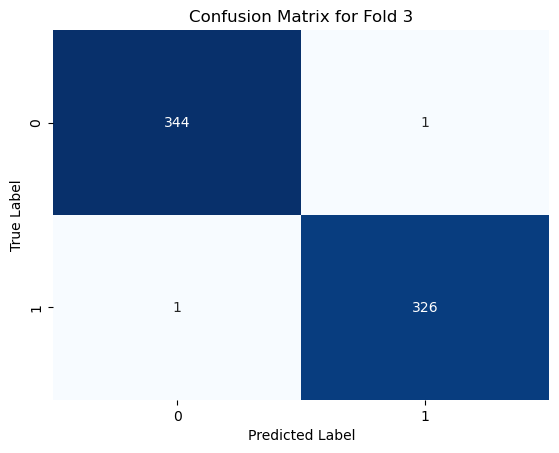

Fold 3 - Accuracy: 0.9970238095238095, Precision: 0.9969418960244648, Recall: 0.9969418960244648, F1 Score: 0.9969418960244648, AUC: 0.9998493108185968
Training fold 4...
Epoch 1/10
84/84 [==============================] - 6s 69ms/step - loss: 0.5632 - accuracy: 0.7150 - val_loss: 0.4186 - val_accuracy: 0.8199
Epoch 2/10
84/84 [==============================] - 5s 65ms/step - loss: 0.4197 - accuracy: 0.8162 - val_loss: 0.3244 - val_accuracy: 0.8929
Epoch 3/10
84/84 [==============================] - 5s 61ms/step - loss: 0.2901 - accuracy: 0.8891 - val_loss: 0.1754 - val_accuracy: 0.9405
Epoch 4/10
84/84 [==============================] - 5s 64ms/step - loss: 0.1946 - accuracy: 0.9379 - val_loss: 0.1065 - val_accuracy: 0.9732
Epoch 5/10
84/84 [==============================] - 5s 65ms/step - loss: 0.1542 - accuracy: 0.9461 - val_loss: 0.0807 - val_accuracy: 0.9732
Epoch 6/10
84/84 [==============================] - 5s 65ms/step - loss: 0.1092 - accuracy: 0.9691 - val_loss: 0.0464 - val_

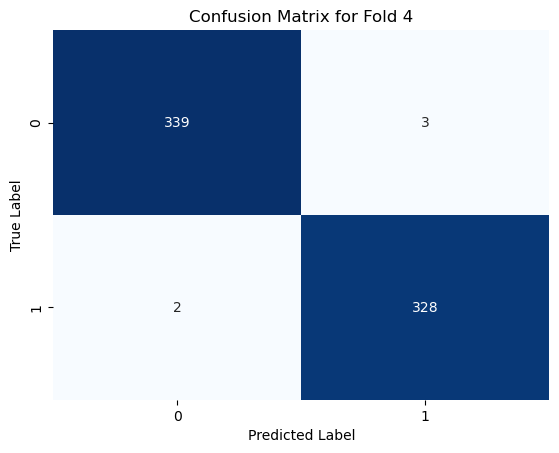

Fold 4 - Accuracy: 0.9925595238095238, Precision: 0.9909365558912386, Recall: 0.9939393939393939, F1 Score: 0.9924357034795764, AUC: 0.9994595073542443
Training fold 5...
Epoch 1/10
84/84 [==============================] - 6s 70ms/step - loss: 0.5341 - accuracy: 0.7407 - val_loss: 0.4296 - val_accuracy: 0.8185
Epoch 2/10
84/84 [==============================] - 6s 67ms/step - loss: 0.3969 - accuracy: 0.8344 - val_loss: 0.2832 - val_accuracy: 0.9033
Epoch 3/10
84/84 [==============================] - 6s 67ms/step - loss: 0.2791 - accuracy: 0.8917 - val_loss: 0.1498 - val_accuracy: 0.9613
Epoch 4/10
84/84 [==============================] - 6s 71ms/step - loss: 0.1811 - accuracy: 0.9382 - val_loss: 0.0949 - val_accuracy: 0.9807
Epoch 5/10
84/84 [==============================] - 6s 69ms/step - loss: 0.1581 - accuracy: 0.9464 - val_loss: 0.0626 - val_accuracy: 0.9926
Epoch 6/10
84/84 [==============================] - 6s 69ms/step - loss: 0.1119 - accuracy: 0.9650 - val_loss: 0.0486 - val_

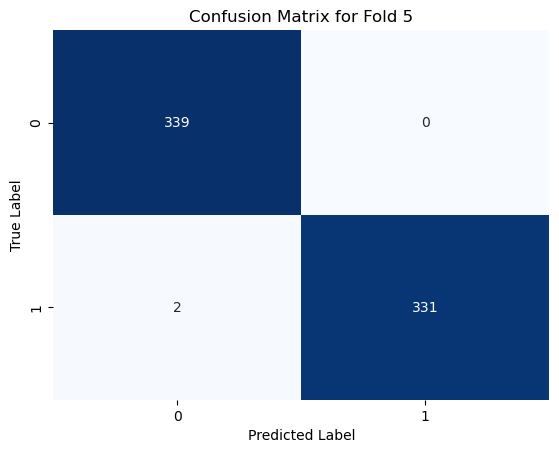

Fold 5 - Accuracy: 0.9970238095238095, Precision: 1.0, Recall: 0.993993993993994, F1 Score: 0.9969879518072289, AUC: 0.9986712376092907


In [12]:
# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies, fold_precisions, fold_recalls, fold_f1s, fold_aucs = [], [], [], [], []
history_list = []

for fold, (train_index, test_index) in enumerate(kf.split(data)):
    print(f"Training fold {fold + 1}...")

    # Split the data
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # One-hot encode the labels for CNN training
    y_train = to_categorical(y_train)
    y_test_categorical = to_categorical(y_test)

    # Build CNN model
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(29, 5, 1)),
        MaxPooling2D(pool_size=(2, 1)),
        Dropout(0.3),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 1)),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train model and save history for training curve
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test_categorical), verbose=1)
    history_list.append(history)

    # Predictions and evaluation
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    fold_aucs.append(roc_auc)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Store metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    fold_accuracies.append(acc)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1s.append(f1)

    print(f"Fold {fold + 1} - Accuracy: {acc}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}, AUC: {roc_auc}")


In [13]:
# Average metrics across folds
print("\nCross-Validation Results:")
print(f"Average Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Average Precision: {np.mean(fold_precisions):.4f}")
print(f"Average Recall: {np.mean(fold_recalls):.4f}")
print(f"Average F1 Score: {np.mean(fold_f1s):.4f}")
print(f"Average AUC Score: {np.mean(fold_aucs):.4f}")


Cross-Validation Results:
Average Accuracy: 0.9932
Average Precision: 0.9941
Average Recall: 0.9924
Average F1 Score: 0.9932
Average AUC Score: 0.9995


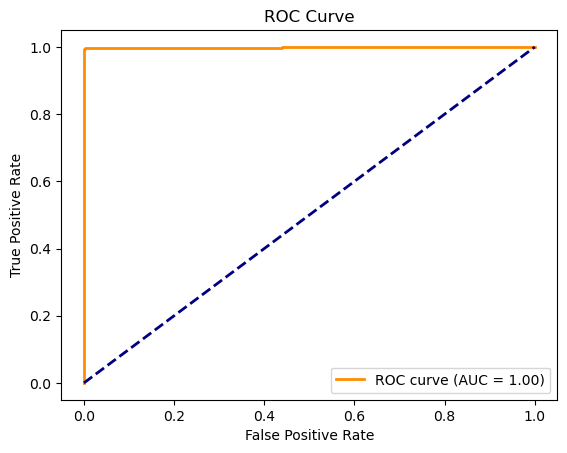

In [14]:
# Plot ROC Curve for the last fold
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

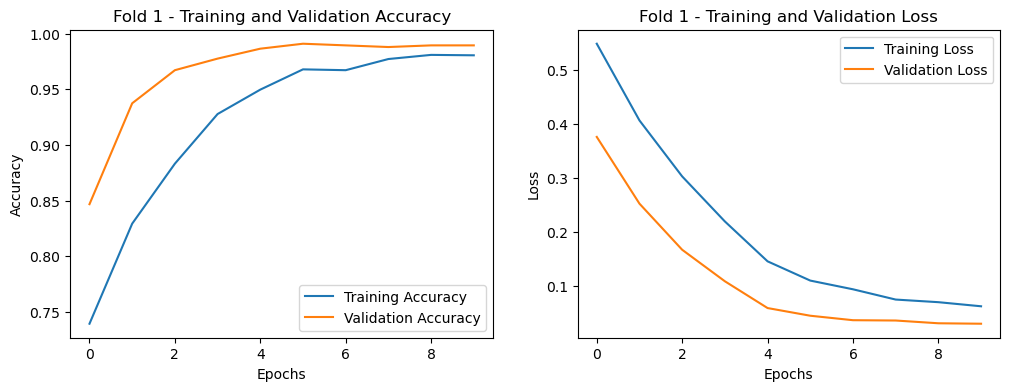

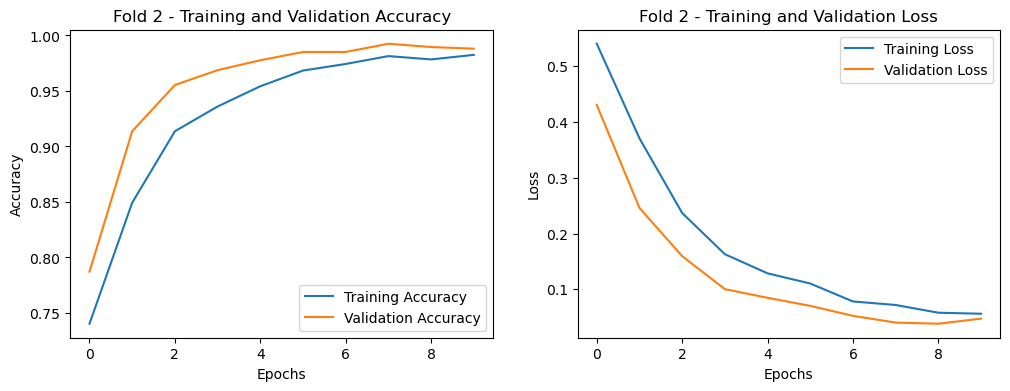

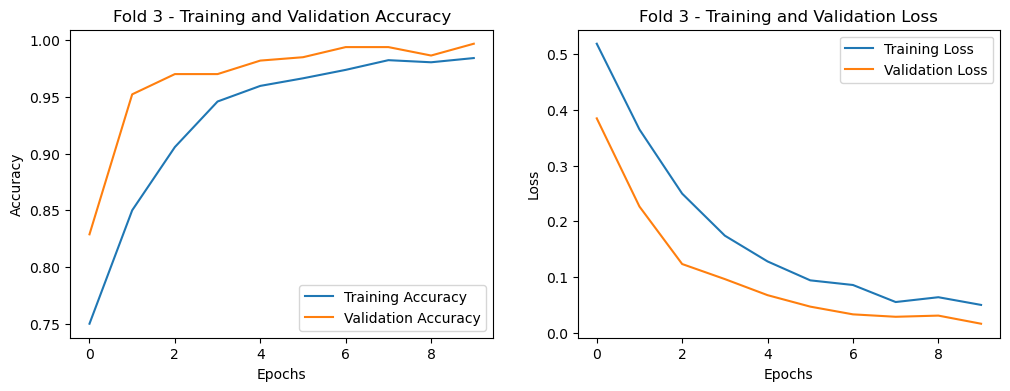

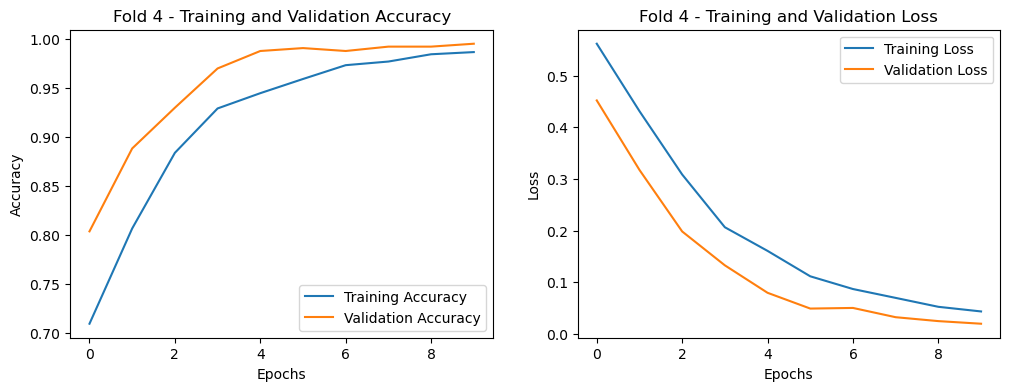

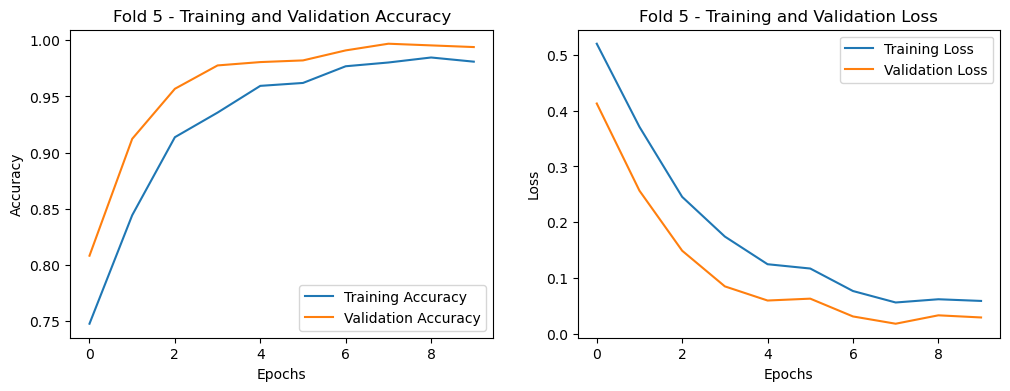

In [16]:
# Plot Training and Validation Accuracy & Loss for each fold
for i, history in enumerate(history_list):
    plt.figure(figsize=(12, 4))
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {i + 1} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {i + 1} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()